# Regularization
Reducing the variance in our model. The more complex a model is, the more it will vary according to our training data. This results in poor performance when applied on test data ie Overfitting. Regularization reduces the variance of our model by incorporating penalties for magnitude of coefficients of variable ($\beta_i$). 

Regularisation is also used for removing less important features as it reduces coeff of these features to zero or approximately zero. Hence it is also a feature selection technique.

Techniques:
1. Ridge Regression
2. Lasso

In [1]:
# import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Let RSS be
RSS = $\sum_{i=1}^{n} (y_i-\beta_0-\sum_{j=1}^{p}\beta_jx_{ji})$ <br />
where p = No. of Parameters or variables <br />
$\beta_j$ = Coefficients <br />

## 1. Ridge Regression 
Instead of MSE or RSS, cost function is modified as: <br />
Cost = $[RSS + \lambda\sum_{j=1}^{p}(\beta_j)^2]$

A penalty is applied for $(\beta_j)^2$ in the cost function which tends to reduce the coefficients of variables.

## 2. Lasso
Instead of MSE or RSS, cost function is modified as: <br />
Cost = $[RSS + \lambda\sum_{j=1}^{p}\lvert\beta_j\rvert]$

A penalty is applied for $(\lvert\beta_j\rvert)$ in the cost function which tends to reduce the coefficients of variables.

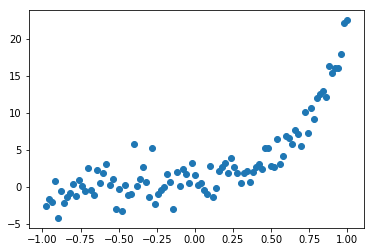

In [2]:
# load a polynomial dataset from csv - easy way
df = pd.read_csv('Datasets/ship_speed_fuel.csv')
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# plot data
plt.scatter(x, y)
plt.show()

A function to split dataset into into train and test sets by given spit ratio.

In [3]:
# a method to split dataset into train and test with given ratio
def split_test_train(x, y, ratio = 0.8):
    rint = np.arange(x.shape[0], dtype='int')
    np.random.shuffle(rint)
    # number of data points in training set
    num = int(x.shape[0] * ratio)
    x_train = x[rint[0:num]]
    y_train = y[rint[0:num]]
    x_test = x[rint[num:x.shape[0]]]
    y_test = y[rint[num:x.shape[0]]]
    return x_train, y_train, x_test, y_test

Build a model of degree n: 
y = w<sub>0</sub> + w<sub>1</sub>*x + w<sub>2</sub>*x<sup>2</sup> + ...... + w<sub>n</sub>x<sup>n</sup>

In [4]:
# build a polynomial model of given degree
def build_polynomial_model(X, degree):
    # initialize weights and bias with random values
    w = tf.Variable([np.random.randn()] * (degree + 1), name = 'weights')
    
    terms = []
    # add polynomial terms upto degree specified
    for i in range(degree + 1):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    
    model = tf.add_n(terms)
    
    return model, w

Split and plot data

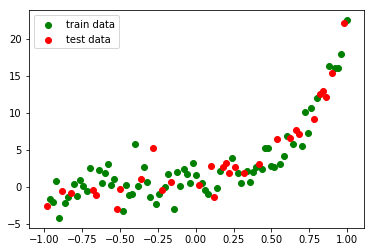

In [5]:
# split test and train dataset
x_train , y_train, x_test, y_test = split_test_train(x, y, ratio = 0.7)

# plot train and test data
plt.scatter(x_train, y_train, c='g', label='train data')
plt.scatter(x_test, y_test, c='r', label='test data')
plt.legend()
plt.show()

In [6]:
def plot_graphs(etrain, etest, weight, degree):
    lmbda = np.linspace(0, max_lambda, 100)

    # plot the results
    fig, axes = plt.subplots(1, 2, figsize=(9, 5))
    # subplot 1 test and train error
    axes[0].plot(lmbda, etrain, 'g', label = 'Train Error')
    axes[0].plot(lmbda, etest, 'r', label = 'Test Error')
    axes[0].legend()
    axes[0].set_xlabel('Lambda')
    axes[0].set_ylabel('Error')

    # subplot 2 weights
    labels = ['w'] * (degree+1)
    labels = [l+str(i) for (l,i) in zip(labels, list(range(degree+1)))]
    # print(labels)
    axes[1].plot(lmbda, weight)
    axes[1].set_xlabel('Lambda')
    axes[1].set_ylabel('Coefficients / Weights')
    axes[1].legend(labels)
    plt.show()

A function that builds the model and trains it with given parameters. Cost functions are defined and appropriate one is used according to value of boolean is_ridge. The model is trainded for 0<$\lambda$<max_lambda. <br />
Different values of $\lambda$ is set at each iteration, resulting in increasing penalties on $\beta_i$.

In [7]:
def train_model(epochs, degree, learning_rate, max_lambda):
    X = tf.placeholder(dtype = tf.float32)
    Y = tf.placeholder(dtype = tf.float32)

    y_model, w = build_polynomial_model(X, degree)

    # Mean squared error
    mse = tf.reduce_mean(tf.square(Y - y_model))

    # cost function
    reg_lambda = tf.Variable(0, trainable = False, dtype=tf.float32)
    RSS = tf.reduce_sum(tf.square(Y - y_model))
    if is_ridge:
        print("Ridge")
        penalty = tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))
    else:
        print("Lasso")
        penalty = tf.multiply(reg_lambda, tf.reduce_sum(tf.abs(w)))
    
    cost = tf.add(RSS, penalty)

    # training operation
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    # start a session, this time, an interactive session
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    etrain = []
    etest = []
    weights = []

    # passing whole data to optimiser
    for l in np.linspace(0, max_lambda, 100):
        # assign a new value to lambda
        sess.run(tf.assign(reg_lambda, l))
        for i in range(epochs):
            sess.run(train_op, feed_dict = {X: x_train, Y: y_train})

        
        wgt = sess.run(w)
        train_error = sess.run(mse, feed_dict={X: x_train, Y: y_train})
        test_error = sess.run(mse, feed_dict={X: x_test, Y: y_test})
#         print('weight={}, MSE={}'.format(wgt, train_error))

        weights.append(wgt)
        etrain.append(train_error)
        etest.append(test_error)

    sess.close()
    
    plot_graphs(etrain, etest, weights, degree)

Lasso


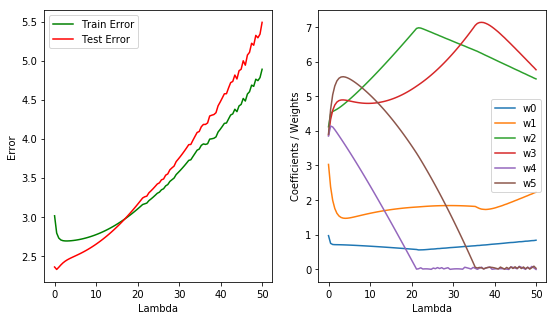

Ridge


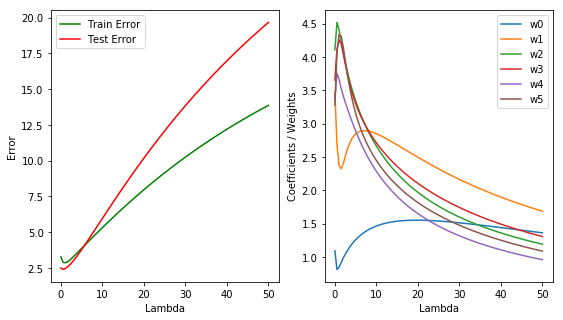

In [8]:
# train model
epochs = 100
degree = 5
learning_rate = 0.001
max_lambda = 50

# set is_ridge to False for lasso
# train model for different values of reg_lambda
is_ridge = False
train_model(epochs, degree, learning_rate, max_lambda)
is_ridge = True
train_model(epochs, degree, learning_rate, max_lambda)

### Results: (Lasso vs Ridge)
* Lasso made the coefficients drop more sharply and equal to zero at $\lambda$=20-35. Overall MSE is also low.
* Ridge made the coefficients to drop but did not set them to zero. A larger value for $\lambda$ might be necessary for making coefficients approximately zero. MSE is also higher compared to lasso.
* MSE in both cases increases as $\lambda$ is increased.